## Question 1

In [ ]:
import numpy as np
import scipy.stats as stats

In [ ]:
def compute_probabilities(mu_x, mu_y,sigma_x2,sigma_y2,rho_xy):

    sigma_x, sigma_y = np.sqrt(sigma_x2), np.sqrt(sigma_y2)

    # (a) P(3 < Y < 8)
    p_a = stats.norm.cdf(8, loc=mu_y, scale=sigma_y) - stats.norm.cdf(3, loc=mu_y, scale=sigma_y)

    # (b) P(3 < Y < 8 | X = 7)
    mu_y_given_x = mu_y + rho_xy * (sigma_y / sigma_x) * (7 - mu_x)
    sigma_y_given_x = sigma_y * np.sqrt(1 - rho_xy**2)
    p_b = stats.norm.cdf(8, loc=mu_y_given_x, scale=sigma_y_given_x) - stats.norm.cdf(3, loc=mu_y_given_x, scale=sigma_y_given_x)

    # (c) P(-3 < X < 3)
    p_c = stats.norm.cdf(3, loc=mu_x, scale=sigma_x) - stats.norm.cdf(-3, loc=mu_x, scale=sigma_x)

    # (d) P(-3 < X < 3 | Y = -4)
    mu_x_given_y = mu_x + rho_xy * (sigma_x / sigma_y) * (-4 - mu_y)
    sigma_x_given_y = sigma_x * np.sqrt(1 - rho_xy**2)
    p_d = stats.norm.cdf(3, loc=mu_x_given_y, scale=sigma_x_given_y) - stats.norm.cdf(-3, loc=mu_x_given_y, scale=sigma_x_given_y)

    return {
        "P(3 < Y < 8)": p_a,
        "P(3 < Y < 8 | X = 7)": p_b,
        "P(-3 < X < 3)": p_c,
        "P(-3 < X < 3 | Y = -4)": p_d
    }


In [ ]:
def main():
  # Compute and print the probabilities
  mu_x = 3
  mu_y = 1
  sigma_x2 = 16
  sigma_y2 = 25
  rho_xy = 0
  probabilities = compute_probabilities(mu_x, mu_y, sigma_x2, sigma_y2, rho_xy)
  for key, value in probabilities.items():
    print(f"{key}: {value:.4f}")

In [ ]:
if __name__ == "__main__":
  main()

P(3 < Y < 8): 0.2638
P(3 < Y < 8 | X = 7): 0.2638
P(-3 < X < 3): 0.4332
P(-3 < X < 3 | Y = -4): 0.4332


## Question 2

In [ ]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

In [ ]:
def generate_multivariate_samples(n, P, mu, Sigma):
    return np.random.multivariate_normal(mu, Sigma, P)

In [ ]:
def compute_Y(X, mu, Sigma_inv):
    diff = X - mu
    return np.einsum('ij,jk,ik->i', diff, Sigma_inv, diff)

In [ ]:
def compute_probability(Y, c):
    return np.mean(Y <= c**2)

In [ ]:
def main():
    # Define parameters
    n = 3  # Dimension
    P = 1000  # Number of samples
    mu = np.zeros(n)  # Mean vector
    Sigma = np.array([[1, 0.5, 0.3], [0.5, 1, 0.2], [0.3, 0.2, 1]])  # Covariance matrix

    # Generate samples
    X = generate_multivariate_samples(n, P, mu, Sigma)

    # Compute Y values
    Sigma_inv = np.linalg.inv(Sigma)
    Y = compute_Y(X, mu, Sigma_inv)

    # Plot histogram of Y
    plt.hist(Y, bins=30, density=True, alpha=0.6, color='g')
    plt.xlabel('Y values')
    plt.ylabel('Density')
    plt.title('Distribution of Y')
    plt.show()

    # Compute probability for a given c
    c = 2
    prob = compute_probability(Y, c)
    print(f'Probability that (x - mu)^T * Sigma^(-1) * (x - mu) <= {c**2}: {prob:.4f}')

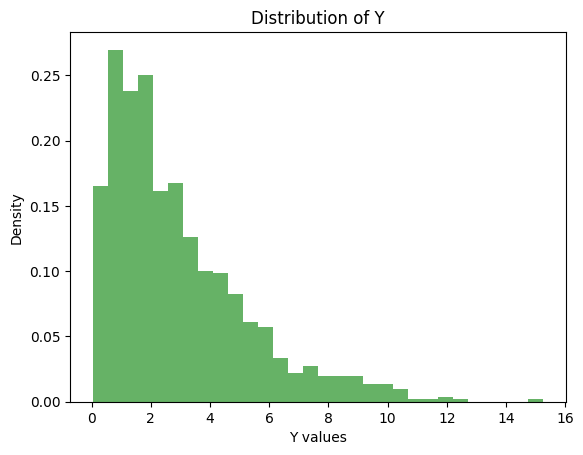

Probability that (x - mu)^T * Sigma^(-1) * (x - mu) <= 4: 0.7420


In [ ]:
if __name__ == "__main__":
    main()

## Question 3

In [ ]:
from google.colab import drive

In [ ]:
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
file_path = "/content/drive/MyDrive/Course Work/Sem 4/Statistical Programming/Assignment-05/File_Datapoints.txt"

In [ ]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

In [ ]:
def generate_multivariate_normal_samples(mu, Sigma, P):
    return np.random.multivariate_normal(mu, Sigma, P)

In [ ]:
def bayes_classifier(X, mu1, Sigma1, mu2, Sigma2, prior1=0.5, prior2=0.5):
    rv1 = stats.multivariate_normal(mean=mu1, cov=Sigma1)
    rv2 = stats.multivariate_normal(mean=mu2, cov=Sigma2)

    post1 = rv1.pdf(X) * prior1
    post2 = rv2.pdf(X) * prior2

    return np.where(post1 > post2, 1, 2)

In [ ]:
def plot_classification(X, labels):
    plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='coolwarm', edgecolor='k')
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.title('Bayesian Classification')
    plt.show()

In [ ]:
def main():
    # Example usage with given parameters
  mu1 = np.array([2, 3])
  Sigma1 = np.array([[1, 0.5], [0.5, 2]])
  mu2 = np.array([-2, -3])
  Sigma2 = np.array([[2, -0.3], [-0.3, 1]])

  # Load data from file
  data = np.loadtxt(file_path, delimiter=" ", usecols=(1, 2), skiprows=1)

  # Classify data
  labels = bayes_classifier(data, mu1, Sigma1, mu2, Sigma2)

  # Plot results
  plot_classification(data, labels)

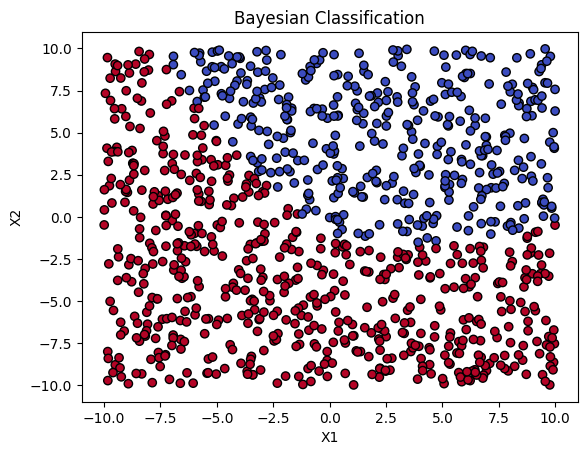

In [ ]:
if __name__=="__main__":
  main()